To gather relevant data for the project, I selected three datasets to support the analysis. The first dataset, obtained from the FAO website through FAOSTAT, covers global food and feed production from 1961 to 2013, as well as a separate dataset from 2010 to 2020. The second dataset, provided by Our World in Data, focuses on greenhouse gas emissions associated with 43 commonly produced foods worldwide. Lastly, the third dataset, also from FAOSTAT, provides annual updates on the average surface temperature variation by country from 1961 to 2022, using anomalies to represent temperature changes relative to the climatology of the period from 1951-1980.

In [221]:
import pandas as pd 

# First, install the missingno library:
# Useful libraries
import warnings
warnings.filterwarnings('ignore')
!pip install missingno
import missingno as msno

# Libraries for data visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go

pyo.init_notebook_mode()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



# **---------------- Feed and Food Production Data --------------**

In [222]:
# Food and feed production worlwide dataset
# In the website of FAOSTAT, I've found to separate datasets one from 1961 to 2013
# and the other is from 2010-2021. Hence, in order to merge the two datasets, I'll make some transformations.
#Let read the data
FAO_1961_2013  = pd.read_csv("/content/FAO_1961_2013.csv", encoding='latin-1')
FAO_2010_2021 = pd.read_csv("/content/FAO_2010_2021.csv", encoding='utf-8')

# Data from 1961 to 2013

In [223]:
# for now we are going to focus on the FAO_1961_2013. Looking at its shape, its cols and the first rows
print(f"Shape of the dataframe: {FAO_1961_2013.shape[0]} rows and {FAO_1961_2013.shape[1]} columns.")
print("\nColumns in this dataframe:\n", FAO_1961_2013.columns)
FAO_1961_2013.head()

Shape of the dataframe: 21477 rows and 63 columns.

Columns in this dataframe:
 Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')


Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude  ...   Y2004   Y2005   Y2006   Y2007   Y2008   Y2009   Y2010  \
0      67.71  ...  3249.0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0   
1      67.71  ...   419.0   445.0   546.0   455.0   490.0   415.0   442.0   
2      67.71  ...    58.0   236.0   262.0   263.0   230.0   379.0   315.0   
3      67.71  ...   185.0    43.0    44.0    48.0    62.0    55.0    60.0   
4      67.71  ...   120.0   208.0   233.0   249.0   247.0   195.0   178.0   

    Y2011  Y2012  Y2013  
0  4711.0   4810   4895  
1   476.0    425    422  
2   203.0    367    360  
3    72.0     78     89  
4   191.0    200    200  

[5 rows x 63 columns]

As we can see there some work to do. There is some uneccessary cols need to be romved. All the cols of Y'....' need to be transformed into one col, and finally change in lower case all labels names

In [224]:
# Change in lower case all labels names
FAO_1961_2013.rename(columns={x:x.lower() for x in FAO_1961_2013.columns}, inplace=True)
#copy data into df_1
df_1 = FAO_1961_2013.copy()
# Delete unnecessary columns
df_1.drop(columns=['area abbreviation','area code', 'item code', 'element code', 'unit'], inplace=True)
# Remove 'Y' from year's labels
df_1.rename(columns={x:x[1:] for x in df_1.columns if 'y' in x}, inplace=True)
df_1 = df_1.melt(
    id_vars=['area', 'item', 'element', 'latitude', 'longitude'], 
    value_vars=[str(n) for n in range(1961, 2013+1)], 
    var_name="year", 
    value_name="value")
#We xant meaningful names, value is Produced_Quantity  
df_1.rename(columns = {'value':'produced_quantity'}, inplace = True)

In [225]:
#After this transformations, let's check the data types 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138281 entries, 0 to 1138280
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   area               1138281 non-null  object 
 1   item               1138281 non-null  object 
 2   element            1138281 non-null  object 
 3   latitude           1138281 non-null  float64
 4   longitude          1138281 non-null  float64
 5   year               1138281 non-null  object 
 6   produced_quantity  1020831 non-null  float64
dtypes: float64(3), object(4)
memory usage: 60.8+ MB


In [226]:
#We will transform year into int 
df_1['year'] = df_1['year'].astype('int')

In [227]:
df_1.head()

area                      item element  latitude  longitude  year  \
0  Afghanistan        Wheat and products    Food     33.94      67.71  1961   
1  Afghanistan  Rice (Milled Equivalent)    Food     33.94      67.71  1961   
2  Afghanistan       Barley and products    Feed     33.94      67.71  1961   
3  Afghanistan       Barley and products    Food     33.94      67.71  1961   
4  Afghanistan        Maize and products    Feed     33.94      67.71  1961   

   produced_quantity  
0             1928.0  
1              183.0  
2               76.0  
3              237.0  
4              210.0

# Data from 2010 to 2021

In [228]:
# Its the turn of FAO_2010_2021. Looking at its shape, its cols and the first rows
print(f"Shape of the dataframe: {FAO_2010_2021.shape[0]} rows and {FAO_2010_2021.shape[1]} columns.")
print("\nColumns in this dataframe:\n", FAO_2010_2021.columns)
FAO_2010_2021.head()

Shape of the dataframe: 216313 rows and 14 columns.

Columns in this dataframe:
 Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')


Domain Code                 Domain  Area Code (FAO)         Area  \
0         FBS  Food Balances (2010-)                2  Afghanistan   
1         FBS  Food Balances (2010-)                2  Afghanistan   
2         FBS  Food Balances (2010-)                2  Afghanistan   
3         FBS  Food Balances (2010-)                2  Afghanistan   
4         FBS  Food Balances (2010-)                2  Afghanistan   

   Element Code Element Item Code (CPC)                Item  Year Code  Year  \
0          5521    Feed           S2511  Wheat and products       2010  2010   
1          5521    Feed           S2511  Wheat and products       2011  2011   
2          5521    Feed           S2511  Wheat and products       2012  2012   
3          5521    Feed           S2511  Wheat and products       2013  2013   
4          5521    Feed           S2511  Wheat and products       2014  2014   

          Unit  Value Flag Flag Description  
0  1000 tonnes  294.0    I    Imputed value  
1  1000 tonnes  282.0    I    Imputed value  
2  1000 tonnes  188.0    I    Imputed value  
3  1000 tonnes  326.0    I    Imputed value  
4  1000 tonnes  141.0    I    Imputed value

In [229]:
# Change in lower case all labels names
FAO_2010_2021.rename(columns={x:x.lower() for x in FAO_2010_2021.columns}, inplace=True)
#copy data into df_1
df_2 = FAO_2010_2021.copy()
# Delete unnecessary columns
df_2.drop(columns=['domain code','domain','area code (fao)', 'item code (cpc)', 'element code', 'year code','unit','flag','flag description'], inplace=True)
#We xant meaningful names, value is Produced_Quantity  
df_2.rename(columns = {'value':'produced_quantity'}, inplace = True)
df_2.head()

area element                item  year  produced_quantity
0  Afghanistan    Feed  Wheat and products  2010              294.0
1  Afghanistan    Feed  Wheat and products  2011              282.0
2  Afghanistan    Feed  Wheat and products  2012              188.0
3  Afghanistan    Feed  Wheat and products  2013              326.0
4  Afghanistan    Feed  Wheat and products  2014              141.0

In [230]:
#Since we are intersted in concatinating the two datasets, we need to add some extra cols to the df_2
#and rearange them in the same order as in df_1
d_long = {aria:longi for aria,longi in zip(df_1['area'].unique(),df_1['longitude'].unique())}
d_lat = {aria:lat for aria,lat in zip(df_1['area'].unique(),df_1['latitude'].unique())}
df_2['latitude'] = df_2['area'].map(d_lat)
df_2['longitude'] = df_2['area'].map(d_long)
df_2 = df_2[df_1.columns.values]
df_2.head()


area                item element  latitude  longitude  year  \
0  Afghanistan  Wheat and products    Feed     33.94      67.71  2010   
1  Afghanistan  Wheat and products    Feed     33.94      67.71  2011   
2  Afghanistan  Wheat and products    Feed     33.94      67.71  2012   
3  Afghanistan  Wheat and products    Feed     33.94      67.71  2013   
4  Afghanistan  Wheat and products    Feed     33.94      67.71  2014   

   produced_quantity  
0              294.0  
1              282.0  
2              188.0  
3              326.0  
4              141.0

In [231]:
#As we can observe, there is an overlapping between the datasets in the period 2010-2013
df_prod1 = df_1
df_prod2 = df_2
df_prod1 = df_prod1[ df_prod1["year"] >= 2010 ] # data from df_1(1961-2013) between 2010-2013 
df_prod2 = df_prod2[ df_prod2["year"] <= 2013 ] # data from df_1(2010-2021) between 2010-2013
# to campare the two datasets let's take an idea using an example
df_prod1 = df_prod1[ df_prod1["element"] == "Feed" ]
df_prod2 = df_prod2[ df_prod2["element"] == "Feed" ]
df_prod1 = df_prod1[ df_prod1["area"] == "Afghanistan" ]
df_prod2 = df_prod2[ df_prod2["area"] == "Afghanistan" ]
df_prod1 = df_prod1[ df_prod1["item"] == "Barley and products" ]
df_prod2 = df_prod2[ df_prod2["item"] == "Barley and products" ]

In [232]:
df_prod1.head()

area                 item element  latitude  longitude  year  \
1052375  Afghanistan  Barley and products    Feed     33.94      67.71  2010   
1073852  Afghanistan  Barley and products    Feed     33.94      67.71  2011   
1095329  Afghanistan  Barley and products    Feed     33.94      67.71  2012   
1116806  Afghanistan  Barley and products    Feed     33.94      67.71  2013   

         produced_quantity  
1052375              315.0  
1073852              203.0  
1095329              367.0  
1116806              360.0

In [233]:
df_prod2.head()

area                 item element  latitude  longitude  year  \
44  Afghanistan  Barley and products    Feed     33.94      67.71  2010   
45  Afghanistan  Barley and products    Feed     33.94      67.71  2011   
46  Afghanistan  Barley and products    Feed     33.94      67.71  2012   
47  Afghanistan  Barley and products    Feed     33.94      67.71  2013   

    produced_quantity  
44              315.0  
45              203.0  
46              367.0  
47              360.0

From the example above we can see that the two datasets have the values in the same period 2010-2013, but this does not ensure that they are indentical overall (we need to check). For me it not really important I will stick with the values of the latest dataset df_prod2 and I will remove the data of the same period from df_prod1.

In [234]:
df_prod1 = df_1
df_prod2 = df_2
df_prod1 = df_prod1[df_prod1["year"] < 2010]

In [235]:
# One ligitamte question to ask (given the fact that the two datasets have been produced separately) is whether they have the 
# same categories in the column 'item'. To check for that let call the unique() fonction
l1 = df_prod1['item'].unique()
l2 = df_prod2['item'].unique()
print("the unique value for the item col inf df_1 is : ",len(l1))
print("the unique value for the item col inf df_2 is : ", len(l2))

the unique value for the item col inf df_1 is :  115
the unique value for the item col inf df_2 is :  98


It seems to be that we don't have the same unique values. That means that we will have missing data in the overall dataset

In [236]:
frames = [df_prod1, df_prod2]
df_result = pd.concat(frames)

In [237]:
df_result.head()

area                      item element  latitude  longitude  year  \
0  Afghanistan        Wheat and products    Food     33.94      67.71  1961   
1  Afghanistan  Rice (Milled Equivalent)    Food     33.94      67.71  1961   
2  Afghanistan       Barley and products    Feed     33.94      67.71  1961   
3  Afghanistan       Barley and products    Food     33.94      67.71  1961   
4  Afghanistan        Maize and products    Feed     33.94      67.71  1961   

   produced_quantity  
0             1928.0  
1              183.0  
2               76.0  
3              237.0  
4              210.0

In [238]:
print('result:', df_result.shape)
print('df1:', df_prod1.shape)
print('df2:', df_prod2.shape)

result: (1268686, 7)
df1: (1052373, 7)
df2: (216313, 7)


# Missing values

I like to deal with data visualy, hence instead of dealing with missing values the traditional way. Let's use missingo library

<Axes: >

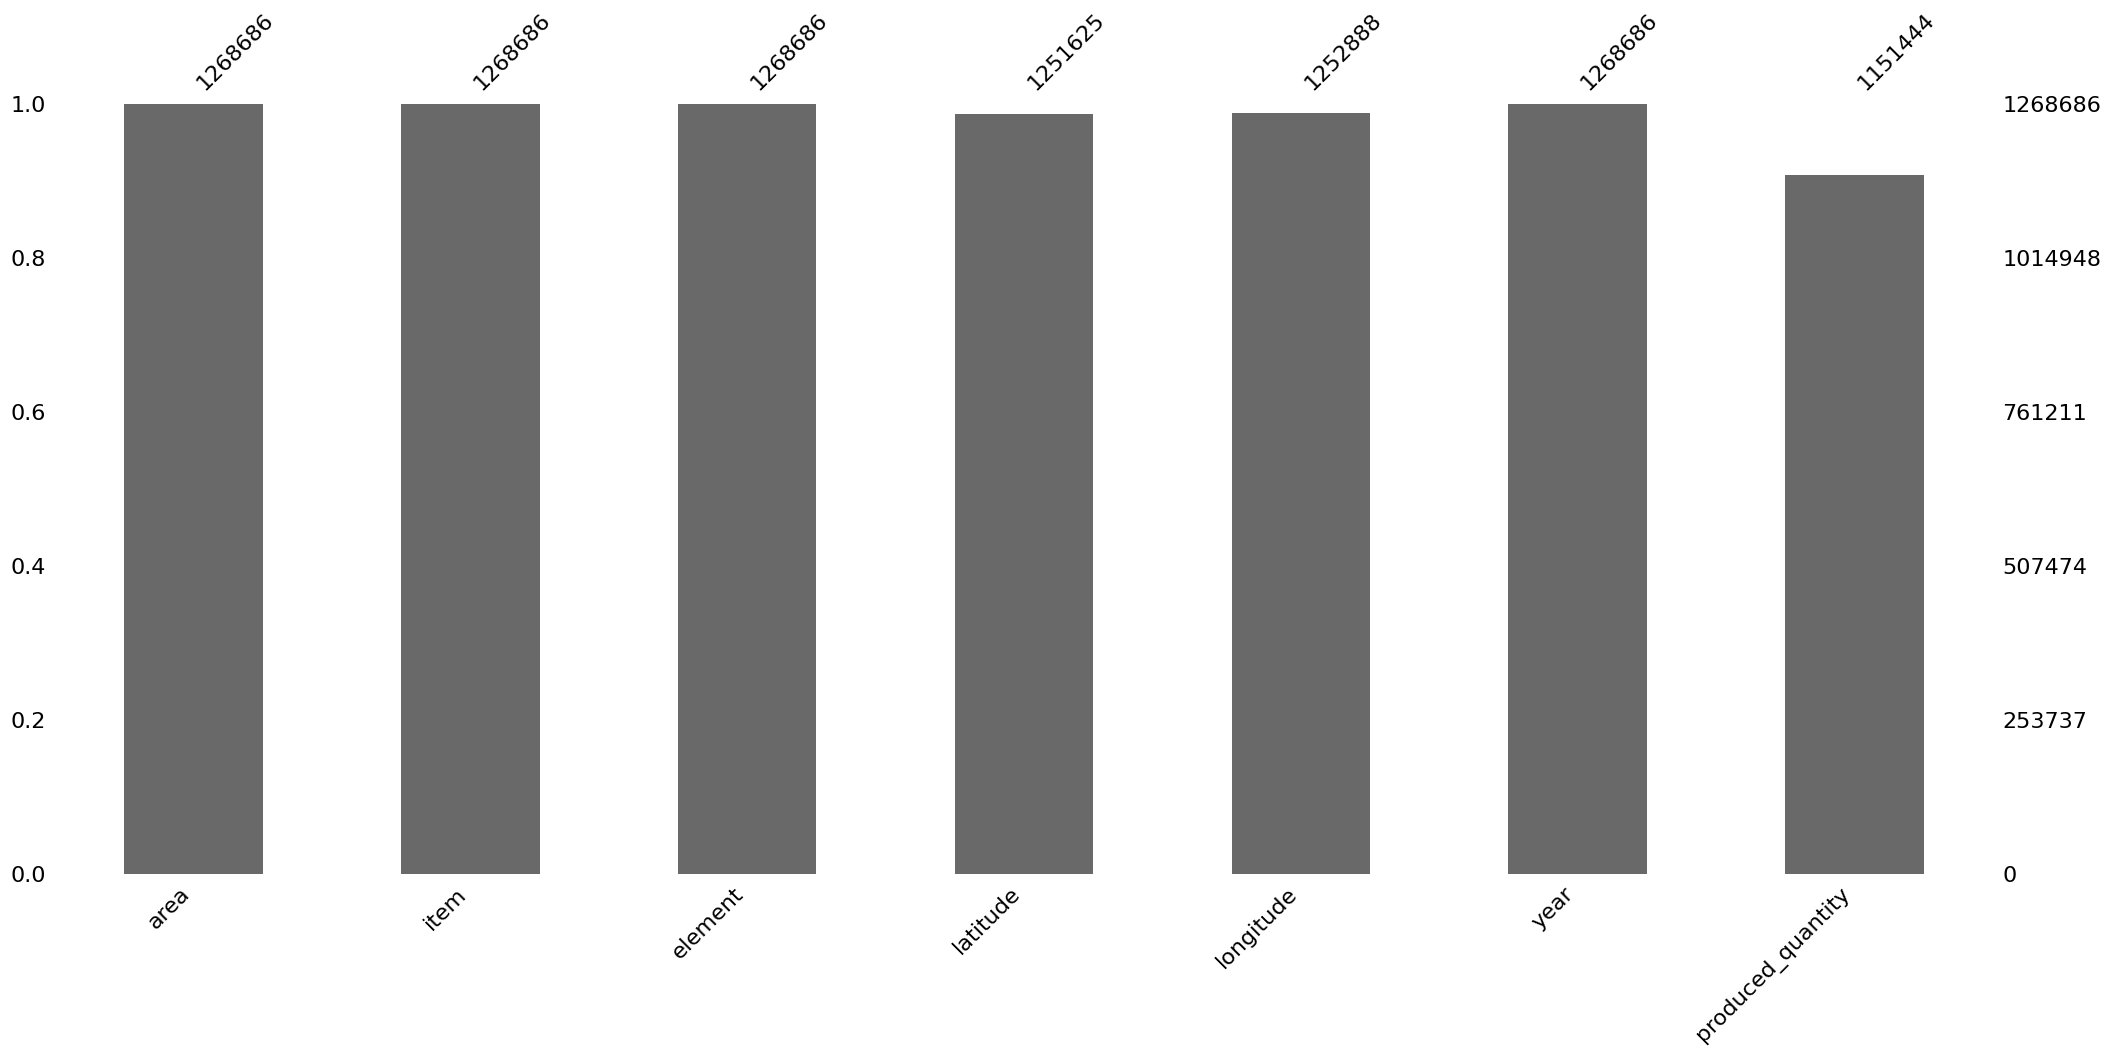

In [239]:
# Use the missingno library to visualize missing data patterns:
msno.bar(df_result)

<Axes: >

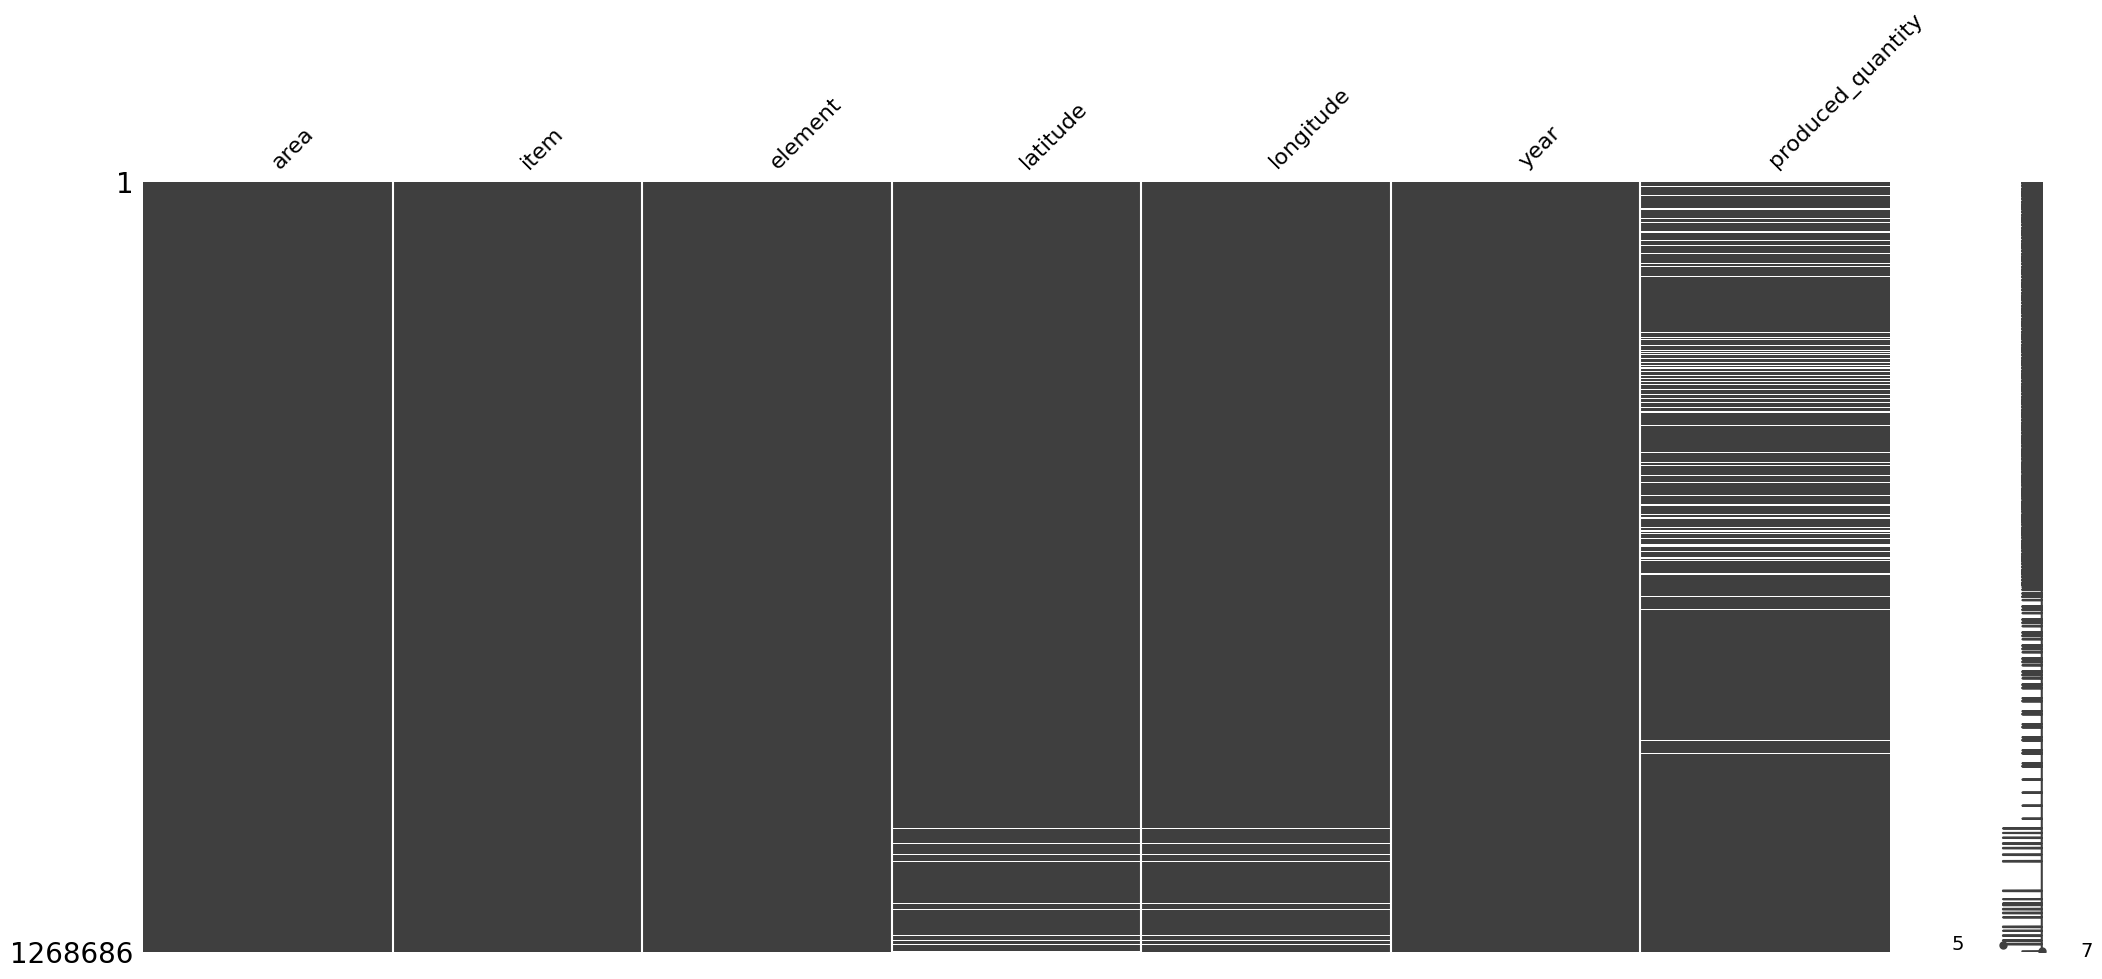

In [240]:
msno.matrix(df_result)

In [241]:
# Create a subset of the dataframe containing at least one missing value in the rows
df_null_rows = df_result.loc[df_result.isnull().any(axis=1)]
print(f'\nNumber of rows with missing values: {df_null_rows.shape[0]}')
# Select a random sample of 5 elements
import random
random.seed(10)
df_null_rows.sample(3)


Number of rows with missing values: 134303


area  \
384108  The former Yugoslav Republic of Macedonia   
366736                                    Belarus   
560704                     Bosnia and Herzegovina   

                                   item element  latitude  longitude  year  \
384108                Vegetables, Other    Food     41.61      21.75  1978   
366736  Grapes and products (excl wine)    Food     53.71      27.95  1978   
560704           Sugar (Raw Equivalent)    Feed     43.92      17.68  1987   

        produced_quantity  
384108                NaN  
366736                NaN  
560704                NaN

In fact, in these five randomly selected countries: Luxembourg, Kyrgyzstan, and Russian Federation, production data are missing from 1961 to 1991. We can look for information on the geopolitical history of these countries to get the reason for justifying the background regarding the presence of missing values.

Is it convenient to delete lines with missing values from the dataframe, or do you risk losing too much of information? I’m running a test to check.

In [242]:
# Create a copy of the dataframe to test the drop of rows with missing values
test_drop = df_result.dropna()

# Calculate the percentage of deleted data 
rows_removal_perc = round((1-test_drop.shape[0]/df_result.shape[0])*100,2)

print(f"\nRows in the original dataframe: {df_result.shape[0]}.") 
print(f"\nDataframe rows after removing missing values: {test_drop.shape[0]}")
print(f'\nRemoving lines that contain NaN values has eliminated {rows_removal_perc}% of the data!')


Rows in the original dataframe: 1268686.

Dataframe rows after removing missing values: 1134383

Removing lines that contain NaN values has eliminated 10.59% of the data!


In my opinion, in this case data loss is tolerable. Therefore, I will continue the study of this dataset by adopting this procedure.


In [243]:
test_drop.shape

(1134383, 7)

In [244]:
df_prod = test_drop
df_prod[df_prod.duplicated()]

area                     item element  latitude  longitude  \
78       Afghanistan                     Eggs    Food     33.94      67.71   
79       Afghanistan  Milk - Excluding Butter    Feed     33.94      67.71   
80       Afghanistan  Milk - Excluding Butter    Food     33.94      67.71   
199          Albania                     Eggs    Food     41.15      20.17   
200          Albania  Milk - Excluding Butter    Feed     41.15      20.17   
...              ...                      ...     ...       ...        ...   
1052246       Zambia  Milk - Excluding Butter    Feed    -13.13      27.85   
1052247       Zambia  Milk - Excluding Butter    Food    -13.13      27.85   
1052366     Zimbabwe                     Eggs    Food    -19.02      29.15   
1052367     Zimbabwe  Milk - Excluding Butter    Feed    -19.02      29.15   
1052368     Zimbabwe  Milk - Excluding Butter    Food    -19.02      29.15   

         year  produced_quantity  
78       1961                8.0  
79       1961               28.0  
80       1961              531.0  
199      1961                3.0  
200      1961                3.0  
...       ...                ...  
1052246  2009                0.0  
1052247  2009               97.0  
1052366  2009               27.0  
1052367  2009               23.0  
1052368  2009              385.0  

[19683 rows x 7 columns]

In [245]:
# Delete duplicates
df_prod.drop_duplicates(inplace=True)
# Reset index of the dataframe
df_prod.reset_index(drop=True, inplace=True)

In [246]:
df_prod.shape

(1114700, 7)

# **---------------- Greenhouse gases emission for food production Data --------------**

In [247]:
# Greenhouse gases emission for food production dataset
Gases_emission= pd.read_csv('/content/Greenhouse_gas_emissions_Food_Production.csv')
df_3 = Gases_emission.copy()


In [248]:
print(f"Shape of the dataframe: {df_3.shape[0]} rows and {df_3.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_3.columns)

df_3.head()

Shape of the dataframe: 43 rows and 23 columns.

Columns in this dataframe:
 Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram 

Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2                                                NaN         ...   
3                                           4.281357         ...   
4                                           9.514379         ...   

   Freshwater withdrawals per 100g protein (liters per 100g protein)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                         371.076923                   
4                                        3166.760563                   

   Freshwater withdrawals per kilogram (liters per kilogram)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                              482.4           
4                                             2248.4           

   Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                           0.945482              
4                                           1.207271              

   Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                           1.907692                      
4                                           6.267606                      

   Land use per 1000kcal (m² per 1000kcal)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                 2.897446   
4                                 0.759631   

   Land use per kilogram (m² per kilogram)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      7.6   
4                                      2.8   

   Land use per 100g protein (m² per 100g protein)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                         5.846154   
4                                         3.943662   

   Scarcity-weighted water use per kilogram (liters per kilogram)  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                     

<Axes: >

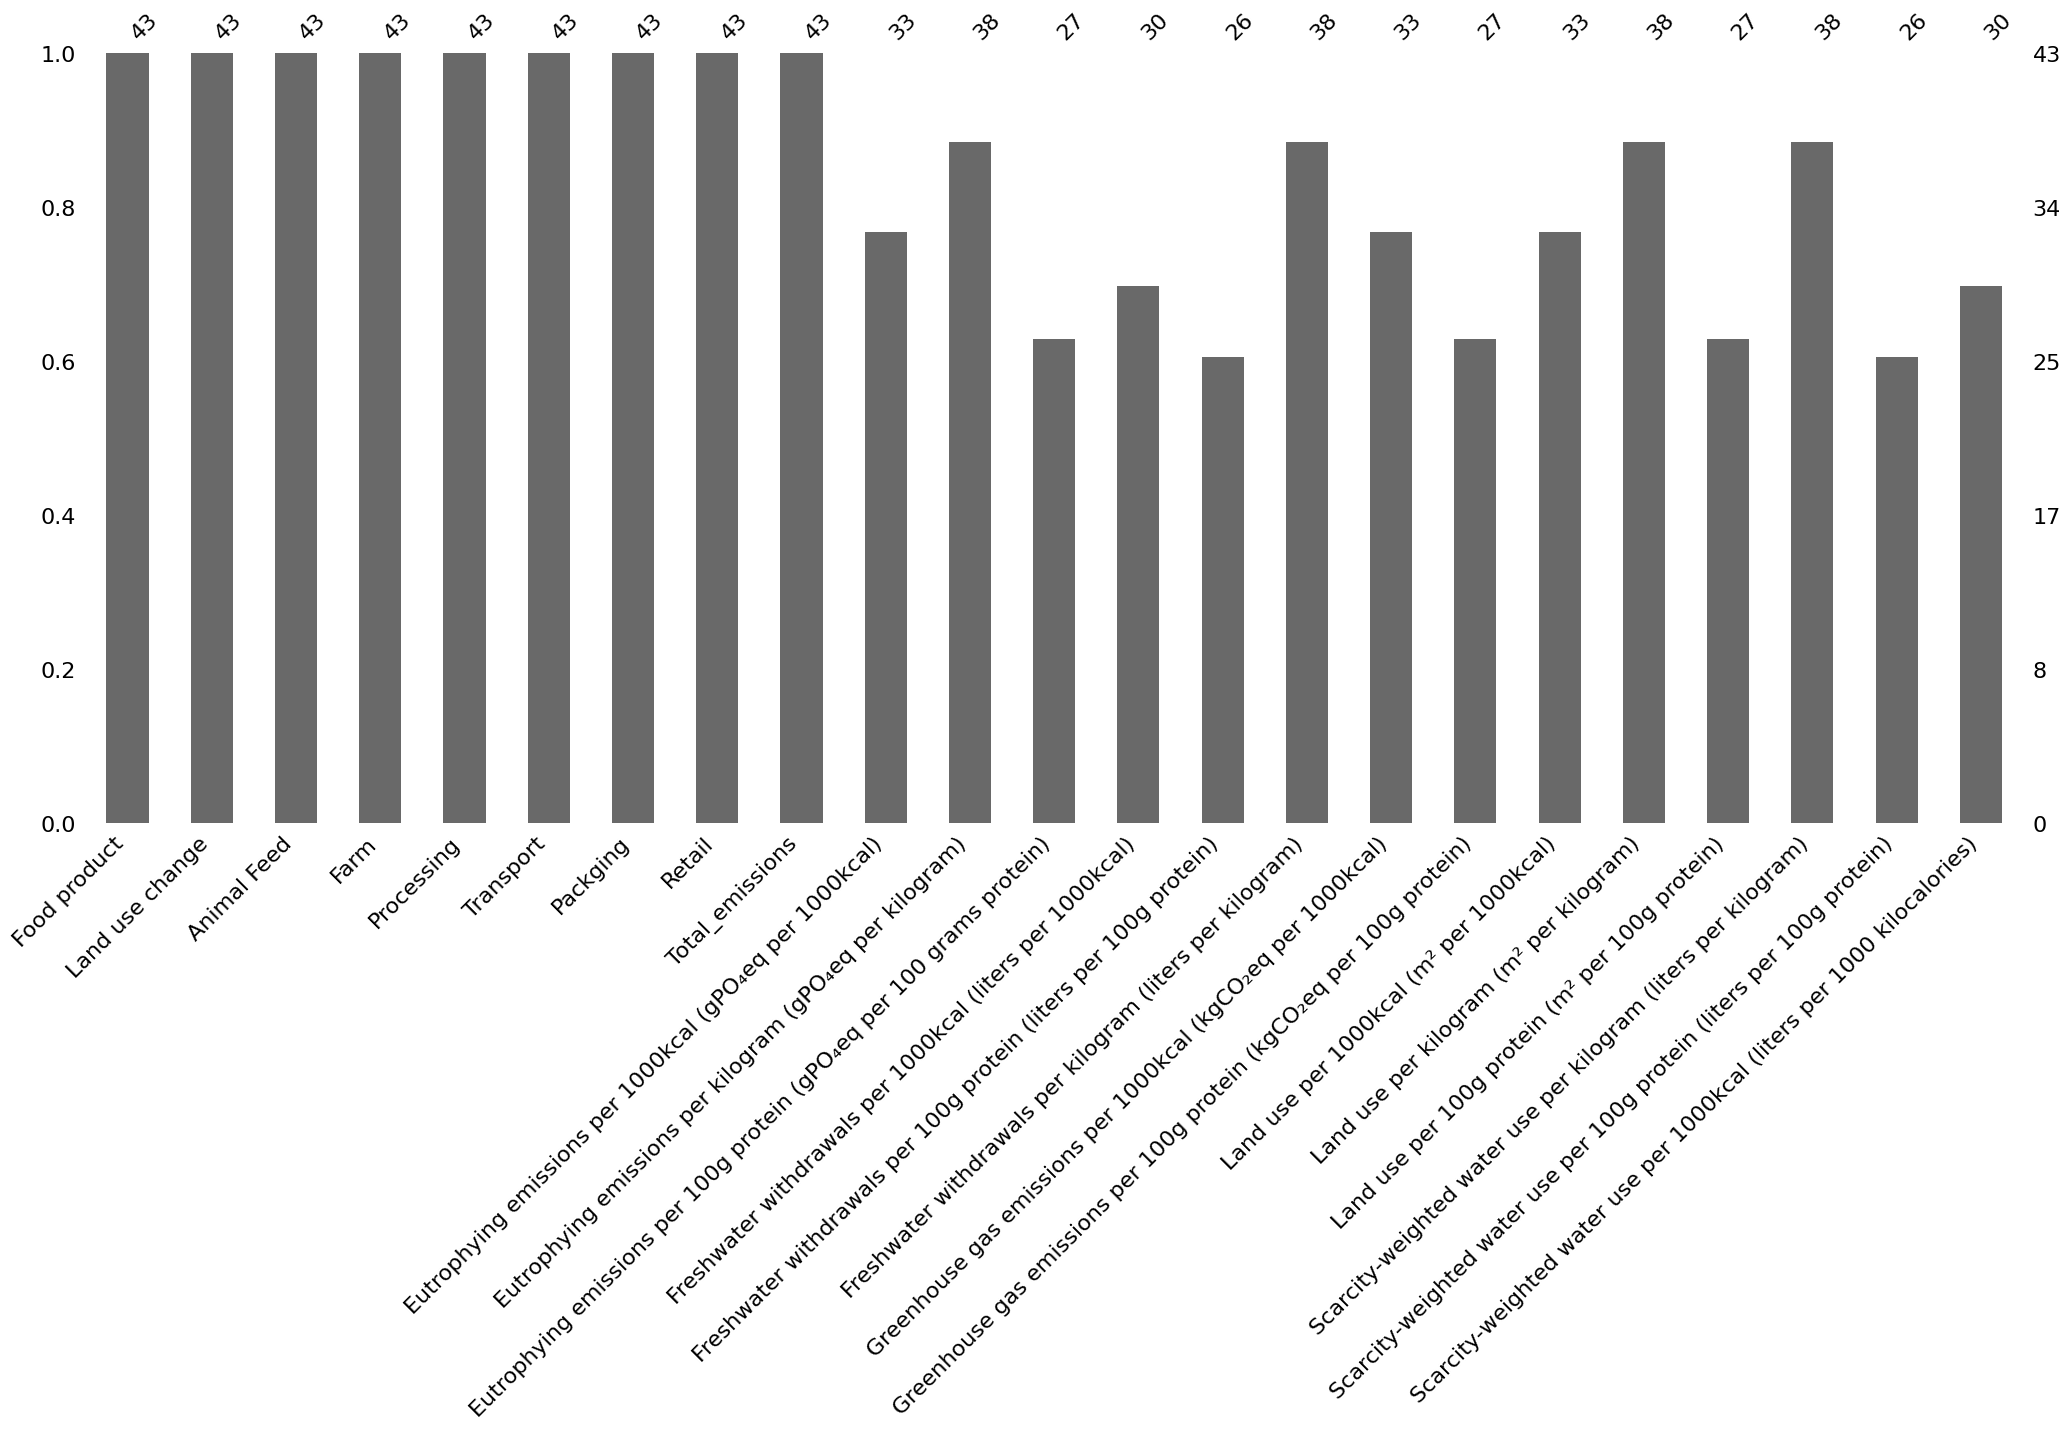

In [249]:
# Use the missingno library to visualize missing data patterns:
msno.bar(df_3)

<Axes: >

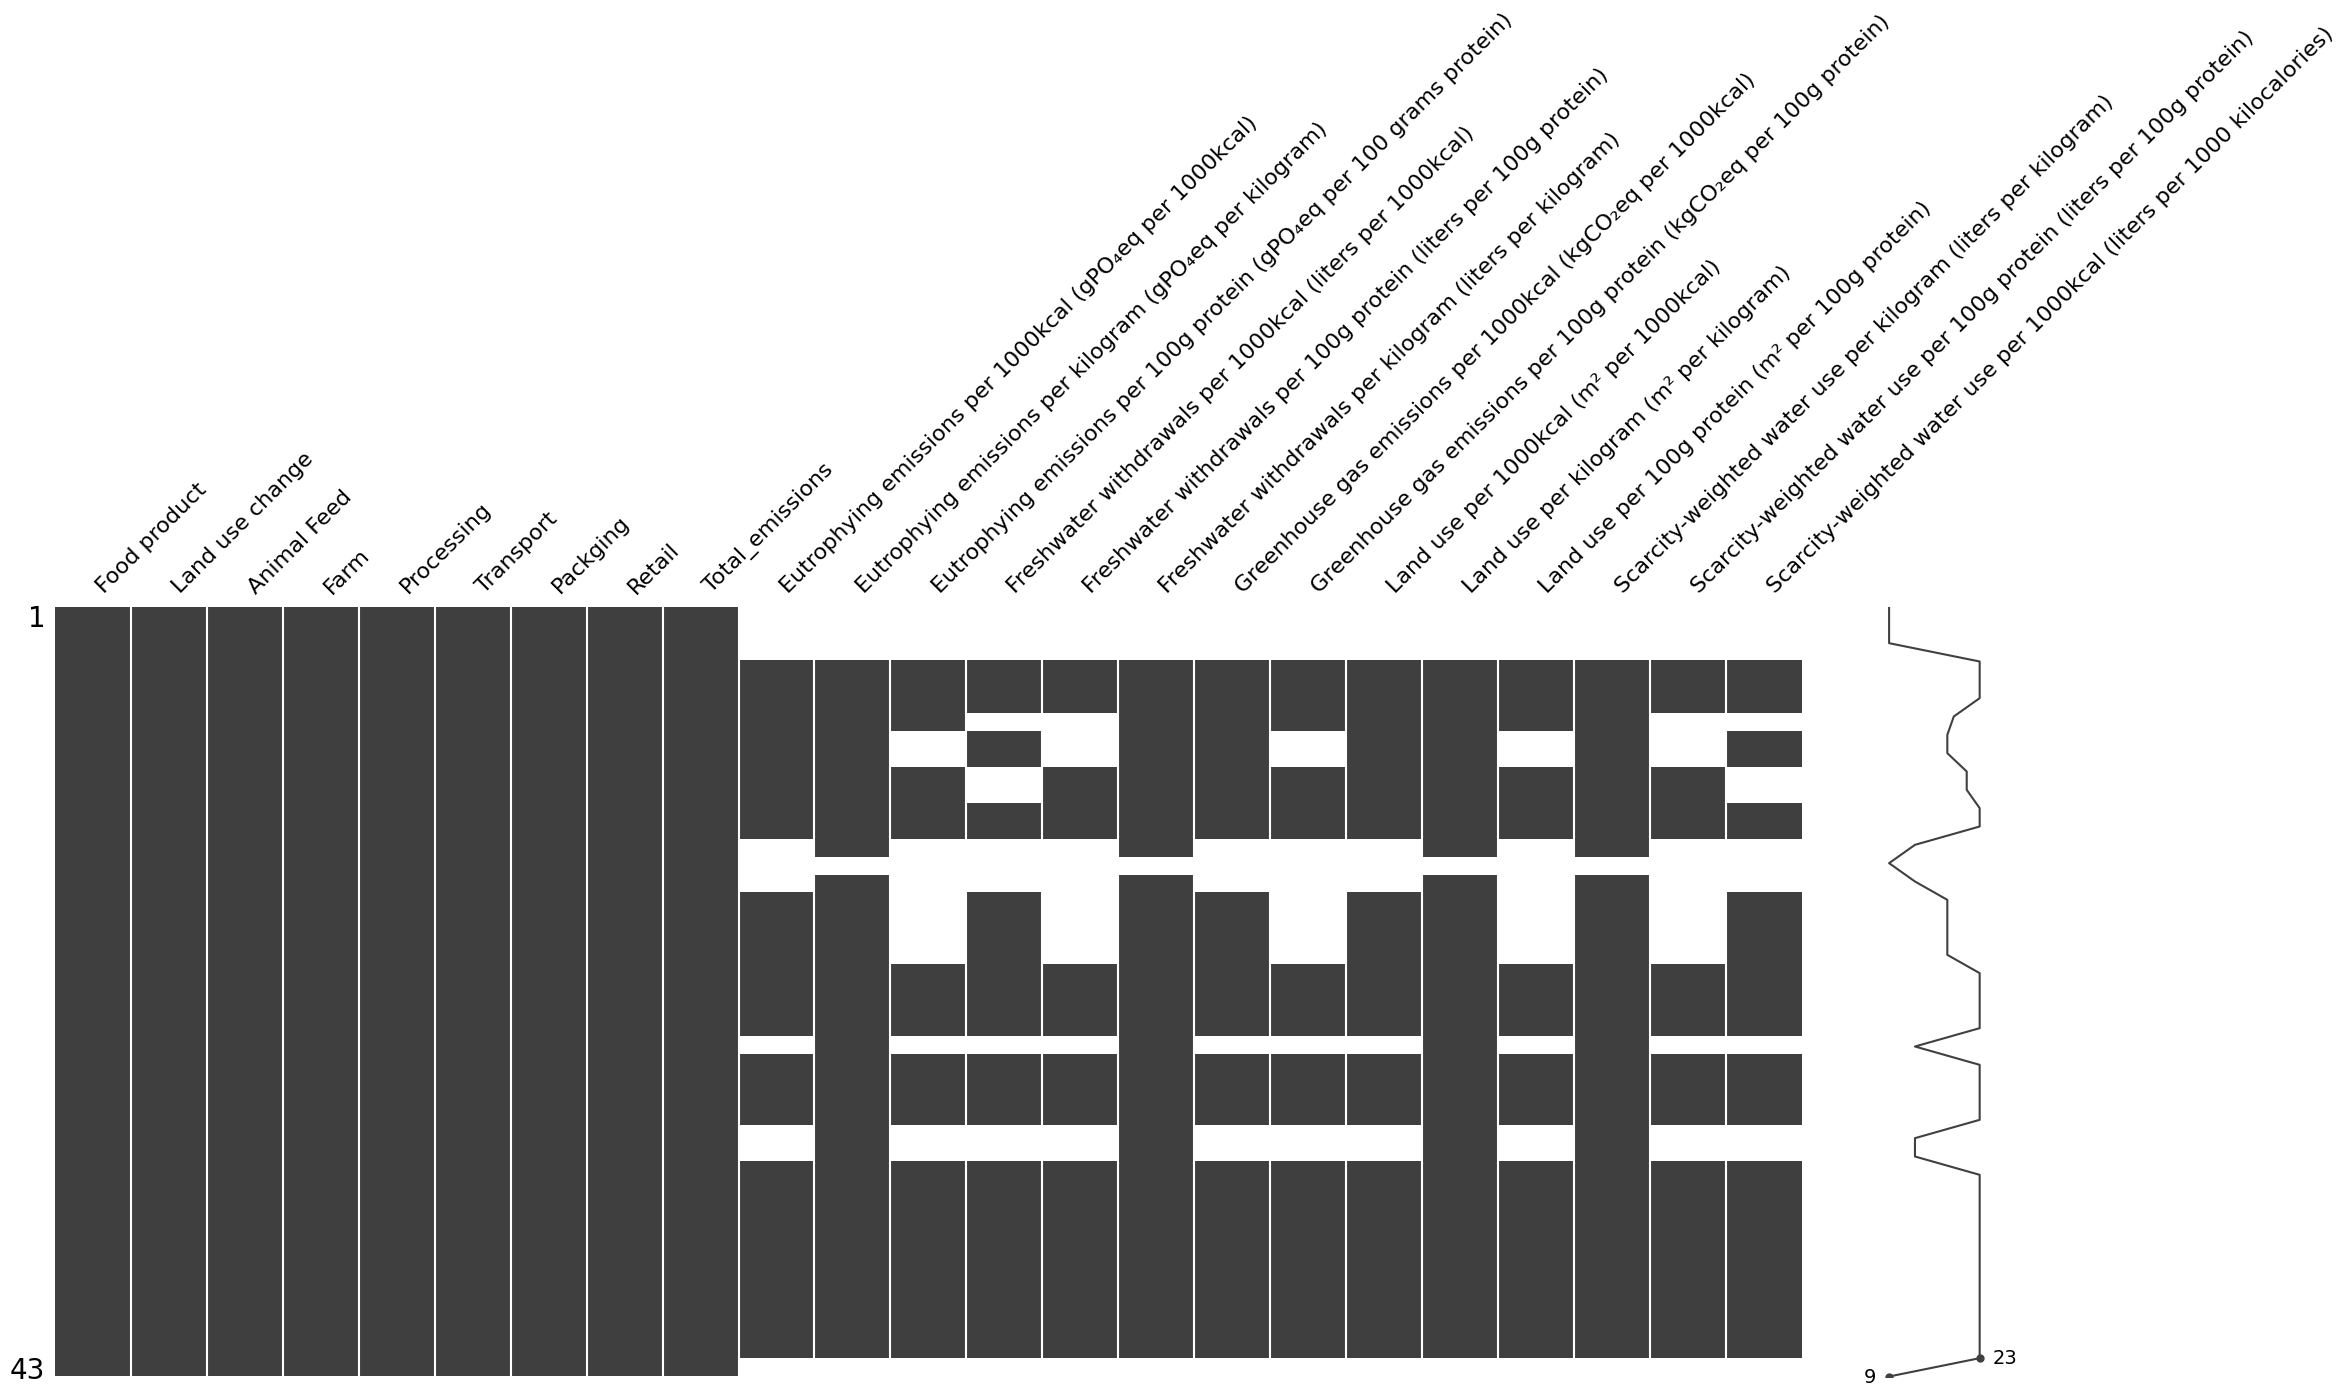

In [250]:
msno.matrix(df_3)

In [251]:
# List of columns to delete The missing values are concentrated exclusively in the columns that evaluate 
# pollutant emissions and water consumption in relation to 1 kilogram, 100 grams of protein, or 1000 kcal 
# of food produced. In this case, I didn't perform an imputation on the presence of these missing values, 
# not being interested in the data contained in these columns. Then, I proceed to delete them directly.

columns_to_delete = [n for n in df_3.columns if '(' in n]
df_3.drop(columns=(columns_to_delete), inplace=True)
# Delete spaces in labels and change them in lower case
df_3.rename(columns={x:x.replace(' ', '_').lower() for x in df_3.columns}, inplace=True)


In [252]:
df_3.head()

food_product  land_use_change  animal_feed  farm  processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   transport  packging  retail  total_emissions  
0        0.1       0.1     0.1              1.4  
1        0.1       0.1     0.0              1.1  
2        0.0       0.5     0.3              1.1  
3        0.1       0.1     0.0              1.6  
4        0.1       0.1     0.1              4.0

# **---------------- Data Visualisation --------------**

In [253]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
# Count the number of occurrences of each element
elements = df_prod.element.value_counts()

# Define a color-blind-friendly color scheme
colors = px.colors.qualitative.Safe

# Create the pie chart
fig = px.pie(
    values=elements.values, 
    names=elements.index,
    color=elements.index,
    color_discrete_sequence=colors)

# Add labels and formatting to the pie chart
fig.update_traces(
    textinfo='label+percent',
    insidetextfont=dict(color='white'),
    marker=dict(line=dict(color='#000000', width=2)))

# Add a title and formatting to the plot
fig.update_layout(
    width=600,
    height=500,
    title='Count of Food and Feed Elements',
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    font=dict(size=18),
    legend_title='Elements',
    legend_font=dict(size=14))

# Show the plot
fig.show(renderer="colab")


In [255]:
food_feed_prod = df_prod.groupby(['element', 'year'])['produced_quantity'].sum().reset_index()

fig = px.line(
    food_feed_prod, 
    x="year",
    y="produced_quantity", 
    color='element',
    color_discrete_map={
        'Feed':'brown',
        'Food':'orange'},
    labels=dict(
        element='Elements',
        year='Year',
        produced_quantity='Production (1000 tons)'),
    hover_data={'produced_quantity': ':,.2f'},
    line_shape='spline'
)

fig.update_layout(
    width=900,
    title='Production of food and feed from 1961 to 2020',
    title_font=dict(size=24),
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    showlegend=True,
    legend_itemclick=False,
    yaxis=dict(title='Production (1000 tons)', title_font=dict(size=18)),
    xaxis=dict(tickmode='linear', tick0=0, dtick=4, tickfont=dict(size=14)),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    hoverlabel=dict(font_size=16),
    hovermode='x unified'
)

fig.update_traces(
    line=dict(width=3, smoothing=1.3),
    fill='tonexty',
    hovertemplate='<b>%{y:,.2f}</b> thousand tons'
)

fig.show(renderer="colab")


In [256]:
# Create a filter for 'Food' related elements
filter_item = df_prod.element == 'Food'

# Create a filter for '2020' production year
filter_year = df_prod.year == 2020

# Create a dataframe subset with conditions imposed by filters and with columns concerning food, countries and production values
food_2020 = df_prod.loc[(filter_item) & (filter_year), ['item', 'area', 'produced_quantity']]

# Sort values in decreasing order and select the first 15 elements
food_2020 = food_2020.sort_values(by='produced_quantity', ascending=False).reset_index(drop=True).head(15)



In [257]:
fig = px.scatter(
    food_2020, 
    x='item',
    y='produced_quantity',

    size='produced_quantity',
    size_max=80,
    
    color='area',
    color_discrete_map={
        'China, mainland': '#e76f51',
        'United States of America': '#f4a261',
        'India': '#264653'},

    hover_name='area',
    hover_data=dict(area = False),

    labels=dict(
        item='item',
        production='produced_quantity'))

fig.update_layout(
    title = 'Top 15 food elements produced in 2020',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    legend_title_text='Countries',
    legend_title_side = 'top',
    showlegend= True,
    legend_itemclick='toggle',

    yaxis = dict(title='Produced quantity (1000 tons)'),
    xaxis = dict(title=None),

    # Set figure size and add gridlines
    width=1000,
    height=600,
    xaxis_showgrid=True,
    yaxis_showgrid=True,

    # Change background color
    plot_bgcolor='white')


fig.show(renderer="colab")

In [258]:
# The fastest strategy I have devised to merge the food and feed data I am interested in is to create two dataframes 
# separately and then join them together. 

# Create a filter for the country
country_filter = df_prod.area == 'China, mainland'

# Create a filter to collect the food items that interest me
food_items = df_prod.item.isin(['Vegetables', 'Vegetables, Other', 'Cereals - Excluding Beer'])

# Create a filter for 'Food' related elements
food_filter = df_prod.element == 'Food'

# Create a dataframe subset using filters and columns I need
china_food = df_prod.loc[(country_filter) & (food_items) & (food_filter), ['element', 'item', 'area', 'produced_quantity', 'year']]

# Sorto 'years' and 'production' values and reset index
china_food = china_food.sort_values(by=['year', 'produced_quantity']).reset_index(drop=True)

# Create a filter to collect the feed items that interest me
feed_items = df_prod.item.isin(['Cereals - Excluding Beer', 'Maize and products', 'Starchy Roots'])

# Create a filter for 'Feed' related elements
feed_filter = df_prod.element == 'Feed'

# As before, create a dataframe subset using filters specified for feed elements
china_feed = df_prod.loc[(country_filter) & (feed_items) & (feed_filter), ['element', 'item', 'area', 'produced_quantity', 'year']]

china_feed = china_feed.sort_values(by=['year', 'produced_quantity']).reset_index(drop=True)

# Concatenate the two dataframes  
chn_food_feed = pd.concat([china_feed, china_food]).reset_index(drop=True)


chn_food_feed.head()

element                      item             area  produced_quantity  year
0    Feed             Starchy Roots  China, mainland             8179.0  1961
1    Feed        Maize and products  China, mainland            13700.0  1961
2    Feed  Cereals - Excluding Beer  China, mainland            17963.0  1961
3    Feed        Maize and products  China, mainland            11795.0  1962
4    Feed             Starchy Roots  China, mainland            13172.0  1962

In [259]:


global_prod = df_prod.groupby(['area', 'latitude', 'longitude', 'year'])['produced_quantity'].sum().reset_index()

fig = px.scatter_geo(
    global_prod,
    lat='latitude',
    lon='longitude',
    color='produced_quantity',
    color_continuous_scale='viridis',
    size='produced_quantity',
    size_max=75,
    
    hover_name='area',
    hover_data=dict(
        latitude=None,
        longitude=None),

    animation_frame='year',
    projection ='natural earth',
    # projection_rotation=dict(lon=-100, lat=40, roll=0),

    range_color=[global_prod.produced_quantity.min(), global_prod.produced_quantity.max()],
    
    labels=dict(
        produced_quantity='Production (1000 tons)',
        year='Year'
    ),


)

fig.update_layout(
    title='Worldwide Total Production from 1961 to 2020',
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',

    dragmode=False,

    width=1000,
    height=600,

    # coloraxis_colorbar=dict(
    #     title='Production (1000 tons)',
    #     title_font_size=16,
    #     tickfont_size=14,
    # ),
    hovermode='closest', # Set hovermode to 'closest' for better hover interactions
)

# Set hovertemplate to customize the hover information
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Production: %{marker.size:,} thousand tons')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show(renderer="colab")


CO₂ emissions from food production

In [260]:
# Get the top 8 food items by total emissions
top_emiss = df_3.sort_values(by='total_emissions', ascending=True).head(40)

# Create the bar chart
fig = px.bar(
    top_emiss,
    y='food_product', # y-axis is set to 'food_product' for vertical bars
    x='total_emissions', # x-axis is set to 'total_emissions'
    color='total_emissions',
    color_continuous_scale='agsunset',
    hover_name='food_product',
    hover_data=dict(
        total_emissions=True,
        food_product=True),
    orientation='h') # set orientation to horizontal

# Set the layout properties
fig.update_layout(
    title='Greenhouse gas emissions per kilogram of food product',
    yaxis=dict(
        title='Food product',
        tickangle=0, 
        showticklabels=True),
    xaxis=dict(
        title='Emissions (kgCO₂ per kg of product)'), # set xaxis title
    coloraxis_showscale=False,
    height=700,
    width=1000,
    plot_bgcolor='rgba(0,0,0,0)')

# Show the plot
fig.show(renderer="colab")


In [261]:

# Define a custom color palette
colors = 'agsunset'

# Create the figure object
fig = go.Figure(go.Bar(
    x=df_3.sort_values(by=['land_use_change'])['land_use_change'].tail(40),
    y=df_3.sort_values(by=['land_use_change'])['food_product'].tail(40),
    orientation='h',
    marker=dict(
        color=df_3.sort_values(by=['land_use_change'])['land_use_change'].tail(40),
        colorscale=colors,
        cmin=0,
        cmax=max(df_3['land_use_change']),
        showscale=False
    ),
    hovertemplate='%{x:.2f} m² per kg of product<br><extra></extra>',
    hoverlabel=dict(
        bgcolor='#333333',
        font=dict(size=12, color='#ffffff')
    )
))

# Set the layout properties
fig.update_layout(
    title={
        'text': 'Food items by land usage change',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    xaxis=dict(
        title='Land usage (m² per kg of product)',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        ticklen=10,
        tickcolor='#f2f2f2',
        linecolor='#f2f2f2',
        linewidth=1,
        mirror=True,
        showgrid=False,
        showline=True
    ),
    yaxis=dict(
        title=None,
        tickfont=dict(size=8),
        ticklen=10,
        tickcolor='#f2f2f2',
        linecolor='#f2f2f2',
        linewidth=2,
        mirror=True,
        showgrid=False,
        showline=True,
        automargin=True,
    ),
    margin=dict(
        l=100,
        r=200,
        t=50,
        b=50
    ),
    plot_bgcolor='#ffffff',
    paper_bgcolor='#ffffff'
)

# Show the plot
fig.show(renderer="colab")


In [262]:


features=['land_use_change', 'animal_feed', 'farm', 'processing', 'transport', 'packging', 'retail']
colors = ['#ba8759','#412722', '#4c8bf5', '#a51c28', '#6b0f1a', '#1b512d', '#0c7c59']

# Create a dictionary to assign a color to each feature
color_map = {features[n]:colors[n] for n in range(len(colors))}

# Sort the data by the 'farm' feature
top_emiss = top_emiss.sort_values(by=['total_emissions'])

# Create a trace for each feature
traces = []
for feature in features:
    trace = go.Bar(
        x=top_emiss[feature],
        y=top_emiss['food_product'],
        name=feature,
        orientation='h',
        marker=dict(
            color=color_map[feature]
        ),
        hovertemplate='%{x} kgCO₂ per kg of product'
    )
    traces.append(trace)

# Create the figure
fig = go.Figure(data=traces)

fig.update_layout(
    barmode='stack',

    title = 'Food items for Total Emissions of CO₂ -Supply Chain',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',
    height=800,
    width=1200,

    legend_title_text='Production chain',

    xaxis_title='Emissions (kgCO₂ per kg of product)', 
    yaxis_title=None,
    hovermode='y unified',
)

fig.show(renderer="colab")
